In [12]:
import pandas as pd

In [37]:
stats_baseline_95 = "data/stats_baseline_95.csv"
stats_baseline_9 = "data/stats_baseline_9.csv"
stats_baseline_85 = "data/stats_baseline_85.csv"
stats_baseline_8 = "data/stats_baseline_8.csv"

stats_GGGP_95 = "data/stats_GGGP_95.csv"
stats_GGGP_9 = "data/stats_GGGP_9.csv"
stats_GGGP_85 = "data/stats_GGGP_85.csv"
stats_GGGP_8 = "data/stats_GGGP_8.csv"

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

def plot(data_dict):
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each dataset
    for label, csv_path in data_dict.items():
        stat = pd.read_csv(csv_path)
        plt.plot(stat['generation'], stat['best_individual_fitness'], 
                marker='o', linewidth=2, markersize=4, label=label)
    
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness Over Generations - Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [14]:
from matplotlib import pyplot as plt
import pandas as pd

def plot_comparison(data_dict1, data_dict2, title1="Dataset 1", title2="Dataset 2", metric_title="Best Fitness (Mean Tardiness)"):
    # Create figure with 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot first dataset
    for label, csv_path in data_dict1.items():
        stat = pd.read_csv(csv_path)
        ax1.plot(stat['generation'], stat['best_individual_fitness'], 
                marker='o', linewidth=2, markersize=4, label=label)
    
    ax1.set_xlabel('Generation')
    ax1.set_ylabel(metric_title)
    ax1.set_title(title1)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot second dataset
    for label, csv_path in data_dict2.items():
        stat = pd.read_csv(csv_path)
        ax2.plot(stat['generation'], stat['best_individual_fitness'], 
                marker='o', linewidth=2, markersize=4, label=label)
    
    ax2.set_xlabel('Generation')
    ax2.set_ylabel(metric_title)
    ax2.set_title(title2)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [16]:
data_dict_95= {
    'Utilisation 95% GGGP': 'data/stats_GGGP_95.csv',
    'Utilisation 95% Baseline': 'data/stats_baseline_95.csv'
}

data_dict_9= {
    'Utilisation 90% GGGP': 'data/stats_GGGP_9.csv',
    'Utilisation 90%  Baseline': 'data/stats_baseline_9.csv',
}

data_dict_85= {
    'Utilisation 85% GGGP': 'data/stats_GGGP_85.csv',
    'Utilisation 85% Baseline': 'data/stats_baseline_85.csv'
}

data_dict_8= {
    'Utilisation 80% GGGP': 'data/stats_GGGP_8.csv',
    'Utilisation 80% Baseline': 'data/stats_baseline_8.csv',
}


In [19]:
from matplotlib import pyplot as plt
import pandas as pd

def plot_multiple_comparisons(data_dicts, titles, overall_title="Fitness Comparison"):
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()  # Make it easier to iterate
    
    for i, (data_dict, title) in enumerate(zip(data_dicts, titles)):
        ax = axes[i]
        
        # Plot each dataset in the current subplot
        for label, csv_path in data_dict.items():
            stat = pd.read_csv(csv_path)
            ax.plot(stat['generation'], stat['best_individual_fitness'], 
                   marker='o', linewidth=2, markersize=3, label=label)
        
        ax.set_xlabel('Generation')
        ax.set_ylabel('Best Fitness (Mean Tardiness)')
        ax.set_title(title)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(overall_title, fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

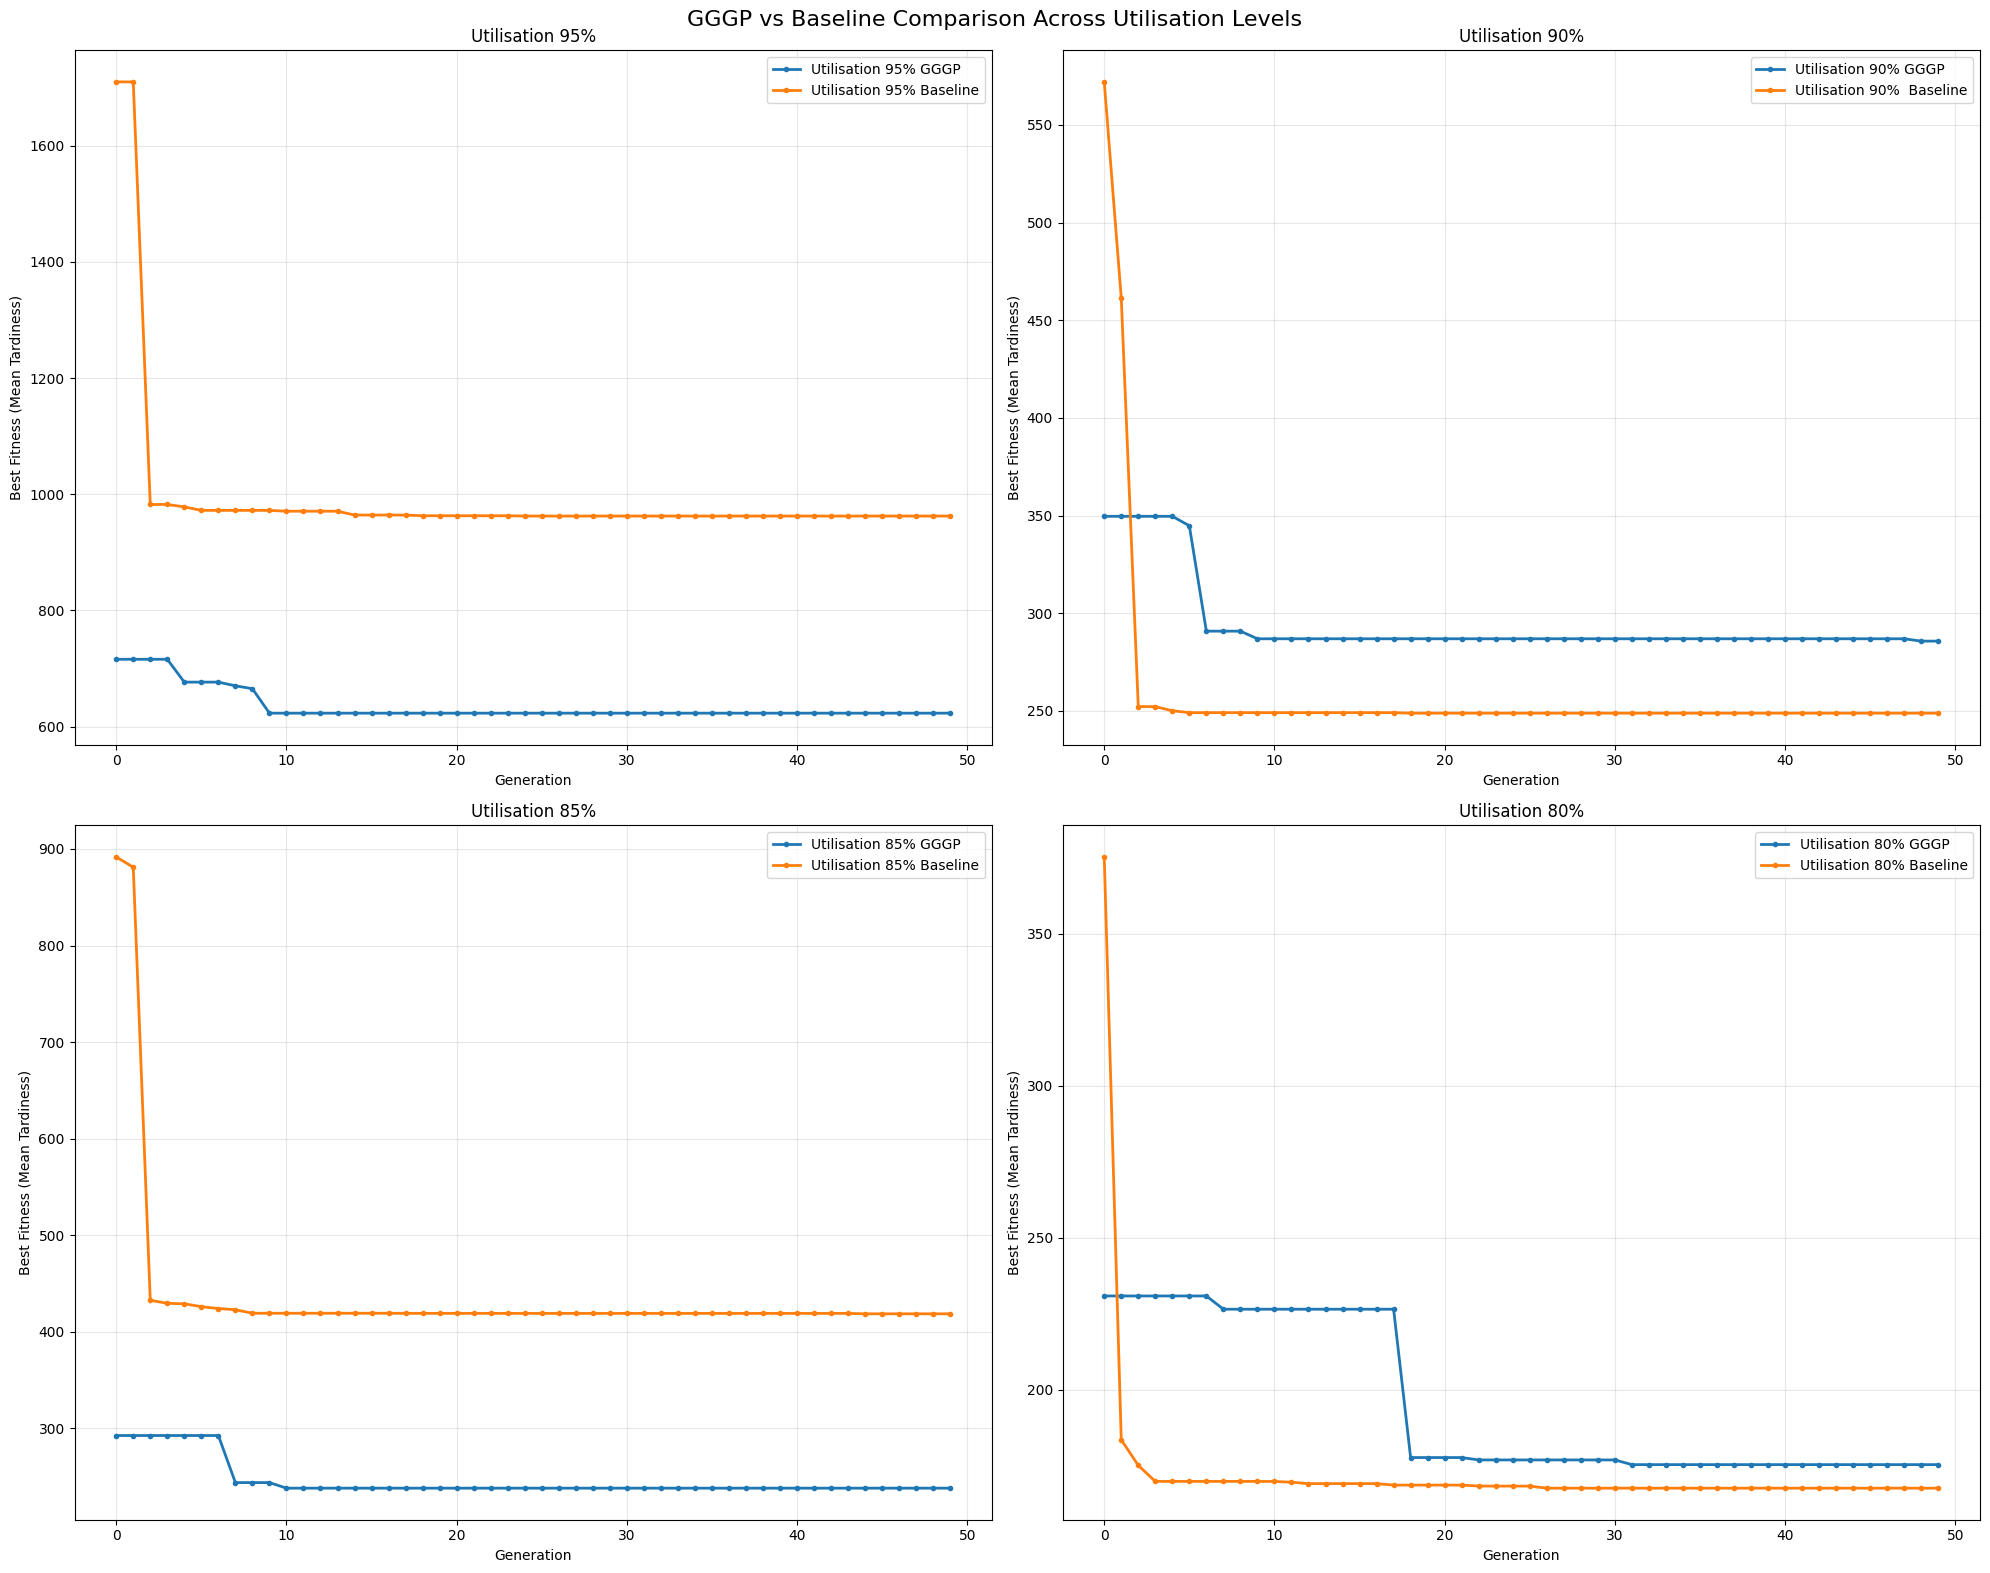

In [20]:
# Call the function with your data dictionaries
plot_multiple_comparisons(
    data_dicts=[data_dict_95, data_dict_9, data_dict_85, data_dict_8], 
    titles=[
        "Utilisation 95%",
        "Utilisation 90%", 
        "Utilisation 85%",
        "Utilisation 80%"
    ],
    overall_title="GGGP vs Baseline Comparison Across Utilisation Levels"
)

In [ ]:
def parse_tree(expr):
    """
    Converts a string expression into a nested list tree.
    """
    expr = expr.replace('(', ' ( ').replace(')', ' ) ')
    tokens = expr.split()
    
    def helper(tokens):
        if not tokens:
            return None, []
        token = tokens.pop(0)
        if token == '(':
            subtree = []
            while tokens[0] != ')':
                child, tokens = helper(tokens)
                subtree.append(child)
            tokens.pop(0)  
            return subtree, tokens
        else:
            return token, tokens
    
    tree, _ = helper(tokens)
    return tree

In [66]:
def get_best_tree(file_name):
    stats = pd.read_csv(file_name)
    best_tree =stats['tree'].iloc[-1]
    return (parse_tree(best_tree), best_tree)

def cal_depth_from_array(tree_array):
    """Calculate depth as the maximum nesting level of arrays"""
    if not isinstance(tree_array, list):
        return 0 
    
    if len(tree_array) == 0:
        return 1 
    
    max_child_depth = 0
    for item in tree_array:
        if isinstance(item, list):
            child_depth = cal_depth_from_array(item)
            max_child_depth = max(max_child_depth, child_depth)
    
    return max_child_depth + 1 


def get_unique_nodes(tree_array):
    """Get unique nodes from tree array by adding them to a set"""
    unique_nodes = set()
    
    def traverse_tree(node):
        if isinstance(node, list):
            # If it's a list, traverse all elements
            for item in node:
                traverse_tree(item)
        else:
            # If it's not a list, add it to the set
            unique_nodes.add(node)
    
    traverse_tree(tree_array)
    return unique_nodes

def count_unique_nodes(tree_array):
    """Count the number of unique nodes in the tree"""
    return len(get_unique_nodes(tree_array))


def get_best_program_stat(file_name):
    (tree, string_tree) = get_best_tree(file_name)
    tree_depth = cal_depth_from_array(tree)
    unqiue_nodes = len(get_unique_nodes(tree))

    return {
        'tree_depth': tree_depth,
        'unqiue_nodes': unqiue_nodes,
        'tree': string_tree
    }


In [70]:

stats_files = {
    'baseline_95': "data/stats_baseline_95.csv",
    'baseline_9': "data/stats_baseline_9.csv",
    'baseline_85': "data/stats_baseline_85.csv",
    'baseline_8': "data/stats_baseline_8.csv",
    'GGGP_95': "data/stats_GGGP_95.csv",
    'GGGP_9': "data/stats_GGGP_9.csv",
    'GGGP_85': "data/stats_GGGP_85.csv",
    'GGGP_8': "data/stats_GGGP_8.csv"
}

results_list = []

for name, file_path in stats_files.items():
    result = get_best_program_stat(file_path)
    result['dataset'] = name
    results_list.append(result)

results_df = pd.DataFrame(results_list)
# results_df.to_csv('tree_analysis_results.csv', index=False)


results_df.head(10)

,tree_depth,unqiue_nodes,tree,dataset
0,7,20,(* (* (exp (* (/ _5 _1) (max PT _10))) (* PT (...,baseline_95
1,7,23,(* (- (- (min (if NPT TimeInSystem TimeInSyste...,baseline_9
2,7,16,(* (* (exp (* (/ _5 _1) (max PT _10))) (* (max...,baseline_85
3,7,17,(* (- (- (min (if NPT TimeInSystem TimeInSyste...,baseline_8
4,4,7,(* (* _10 (/ PT (max _0.1 SLACK))) SLACK),GGGP_95
5,4,8,(* (/ PT (max _1 (+ SLACK _0))) SLACK),GGGP_9
6,3,7,(* (/ PT (max _0.1 SSD)) SLACK),GGGP_85
7,1,3,(* PT SLACK),GGGP_8
